In [1]:
!pip freeze
# Check packages

anyio==4.4.0
appnope==0.1.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2024.8.30
cffi==1.17.1
charset-normalizer==3.3.2
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.5
decorator==5.1.1
defusedxml==0.7.1
executing==2.1.0
fastjsonschema==2.20.0
fonttools==4.53.1
fqdn==1.5.1
h11==0.14.0
httpcore==1.0.5
httpx==0.27.2
idna==3.8
ipykernel==6.29.5
ipython==8.27.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
joblib==1.4.2
json5==0.9.25
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2023.12.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter_client==8.6.2
jupyter_core==5.7.2
jupyter_server==2.14.2
jupyter_server_terminals==0.5.3
jupyterlab==4.2.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
jupyterlab_widgets==3.0.13
kiwisolver==1.4.7
MarkupSafe==2.1.5
matplotlib==3.9.2
matpl

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def root_mean_squared_error(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.precision', 3)       # Set float precision

In [3]:
df = pd.read_csv('train.csv')
df.columns = df.columns.map(lambda x: f'feature_{x}' if x.isdigit() else x)
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,target
0,236,488,16,221,382,97,-4.472,0.107,0,132,281,336,99,3.880,1.798,3.252,12.132,3.091,5.630,4.466,2.511,5.983,4.541,12.740,12.635,4.050,11.827,3.568,13.421,8.252,2.288,14.834,0.082,2.976,5.224,1.212,7.303,7.083,3.610,7.768,7.830,8.395,1.584,10.125,13.341,0.871,1.963,7.467,11.548,8.823,9.046,7.896,11.011,20.107
1,386,206,357,232,1,198,7.810,0.764,1,143,109,123,130,12.100,10.671,14.137,0.217,1.427,0.917,8.168,0.432,5.872,10.401,12.843,7.530,12.525,8.655,8.500,5.603,4.188,13.206,5.433,12.379,11.938,6.057,2.581,11.785,4.446,11.141,0.840,1.482,8.921,4.450,10.585,12.485,7.169,2.885,12.414,10.260,10.091,9.271,3.174,13.922,61.764
2,429,49,481,111,111,146,8.602,0.651,1,430,488,138,80,2.947,12.671,13.280,13.163,9.052,11.606,11.094,10.462,9.828,2.206,9.915,4.448,8.865,10.837,14.168,13.457,14.856,7.596,4.928,2.440,6.791,8.710,1.363,4.981,2.182,14.674,8.083,6.601,6.789,12.982,10.273,14.030,0.395,8.161,12.592,8.938,2.265,11.256,12.795,12.081,74.651
3,414,350,481,370,208,158,8.307,0.425,1,340,111,38,177,5.368,6.766,0.544,7.176,14.515,1.902,9.231,9.601,10.059,5.680,8.238,0.273,11.893,4.031,14.947,7.122,6.508,12.463,12.223,0.319,5.350,3.143,10.292,13.105,10.159,3.671,11.087,1.289,0.249,2.967,6.885,2.790,6.417,10.550,11.456,6.468,2.519,0.258,9.318,5.383,69.425
4,318,359,20,218,317,301,8.124,0.767,1,212,141,417,343,14.592,6.484,9.159,5.083,8.772,7.687,11.107,13.926,0.914,1.418,4.504,6.158,1.791,7.050,14.410,11.616,5.676,9.136,10.640,14.051,2.240,3.272,5.061,3.680,2.949,6.420,14.873,14.807,9.993,3.702,11.163,1.887,1.920,2.268,0.149,4.106,10.416,6.816,8.587,4.512,66.767


### Checking missing values

In [4]:
features = df.drop(['target'], axis=1).copy()


for col in features.columns:
    missing_values_cnt = features[features[col].isnull()].shape[0]
    if missing_values_cnt > 0:
        print(f'{col} - {missing_values_cnt}')


No missing values were found

### Checking features and targets' distributions 

In [5]:
# Checking numerical and categorical features stats separately
# Show numerical features stats
cat_features_names = [col for col in features.columns if  features.dtypes[col] == 'int64']
print(cat_features_names)
cat_features = features[cat_features_names].copy()
num_features_names = [col for col in features.columns if  features.dtypes[col] == 'float64']
num_features = features[num_features_names].copy()
num_features.describe().T



['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12']


,count,mean,std,min,25%,50%,75%,max
feature_6,90000.0,-0.011,7.038,-9.950e+00,-7.071,0.000,7.000,9.950
feature_7,90000.0,0.499,0.289,1.425e-05,0.249,0.497,0.748,1.000
feature_13,90000.0,7.484,4.331,9.507e-05,3.723,7.483,11.243,15.000
feature_14,90000.0,7.498,4.318,2.519e-04,3.764,7.505,11.228,15.000
feature_15,90000.0,7.496,4.339,1.896e-04,3.719,7.503,11.258,15.000
feature_16,90000.0,7.502,4.346,1.916e-04,3.720,7.515,11.285,15.000
feature_17,90000.0,7.486,4.318,6.690e-05,3.759,7.468,11.239,15.000
feature_18,90000.0,7.523,4.323,2.287e-04,3.779,7.539,11.255,15.000
feature_19,90000.0,7.476,4.327,1.245e-04,3.734,7.460,11.211,15.000
feature_20,90000.0,7.495,4.325,3.820e-04,3.749,7.482,11.238,15.000


 *From the numerical stats we can infer that features from 13 to 52 are similar from its distibutions standpoint
The distance between 0%, 25%, 50%, 75% and 100% are almost the same, which points that those features are uniformly distributed from 0 to 15
In the same way, 7 is also looks like uniformly distributed 6th looks more like Gaussian distributed with 0 mu, but should be visualized and tested to know for sure*

            count  unique  top   freq
feature_0   90000     500  416    223
feature_1   90000     500  457    227
feature_2   90000     500  409    225
feature_3   90000     500  484    216
feature_4   90000     500  449    224
feature_5   90000     500   47    226
feature_8   90000       2    0  45073
feature_9   90000     500   75    221
feature_10  90000     500  312    222
feature_11  90000     500  223    220
feature_12  90000     500  105    221
feature_8
0    45073
1    44927
Name: count, dtype: int64


<Figure size 5000x3000 with 0 Axes>

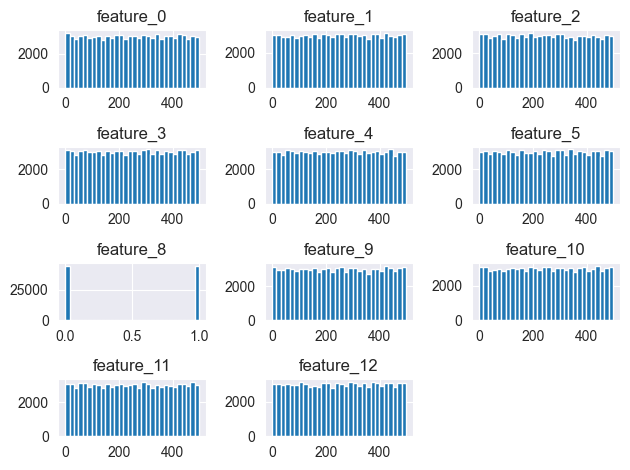

In [6]:
# Checking categorical features stats
cat_features_object_dtype = cat_features.astype('object')
print(cat_features_object_dtype.describe(include='object').T)

print(cat_features.feature_8.value_counts())
# Showing categorical features
plt.figure(figsize=(50, 30))
cat_features.hist(bins=30)
plt.tight_layout() 
plt.show()



*Found feature_8 to be boolean, Bernouli distribution with p close to 0.5*
*The plots of categorical features looks close to be uniformly distributed except feature 8.*

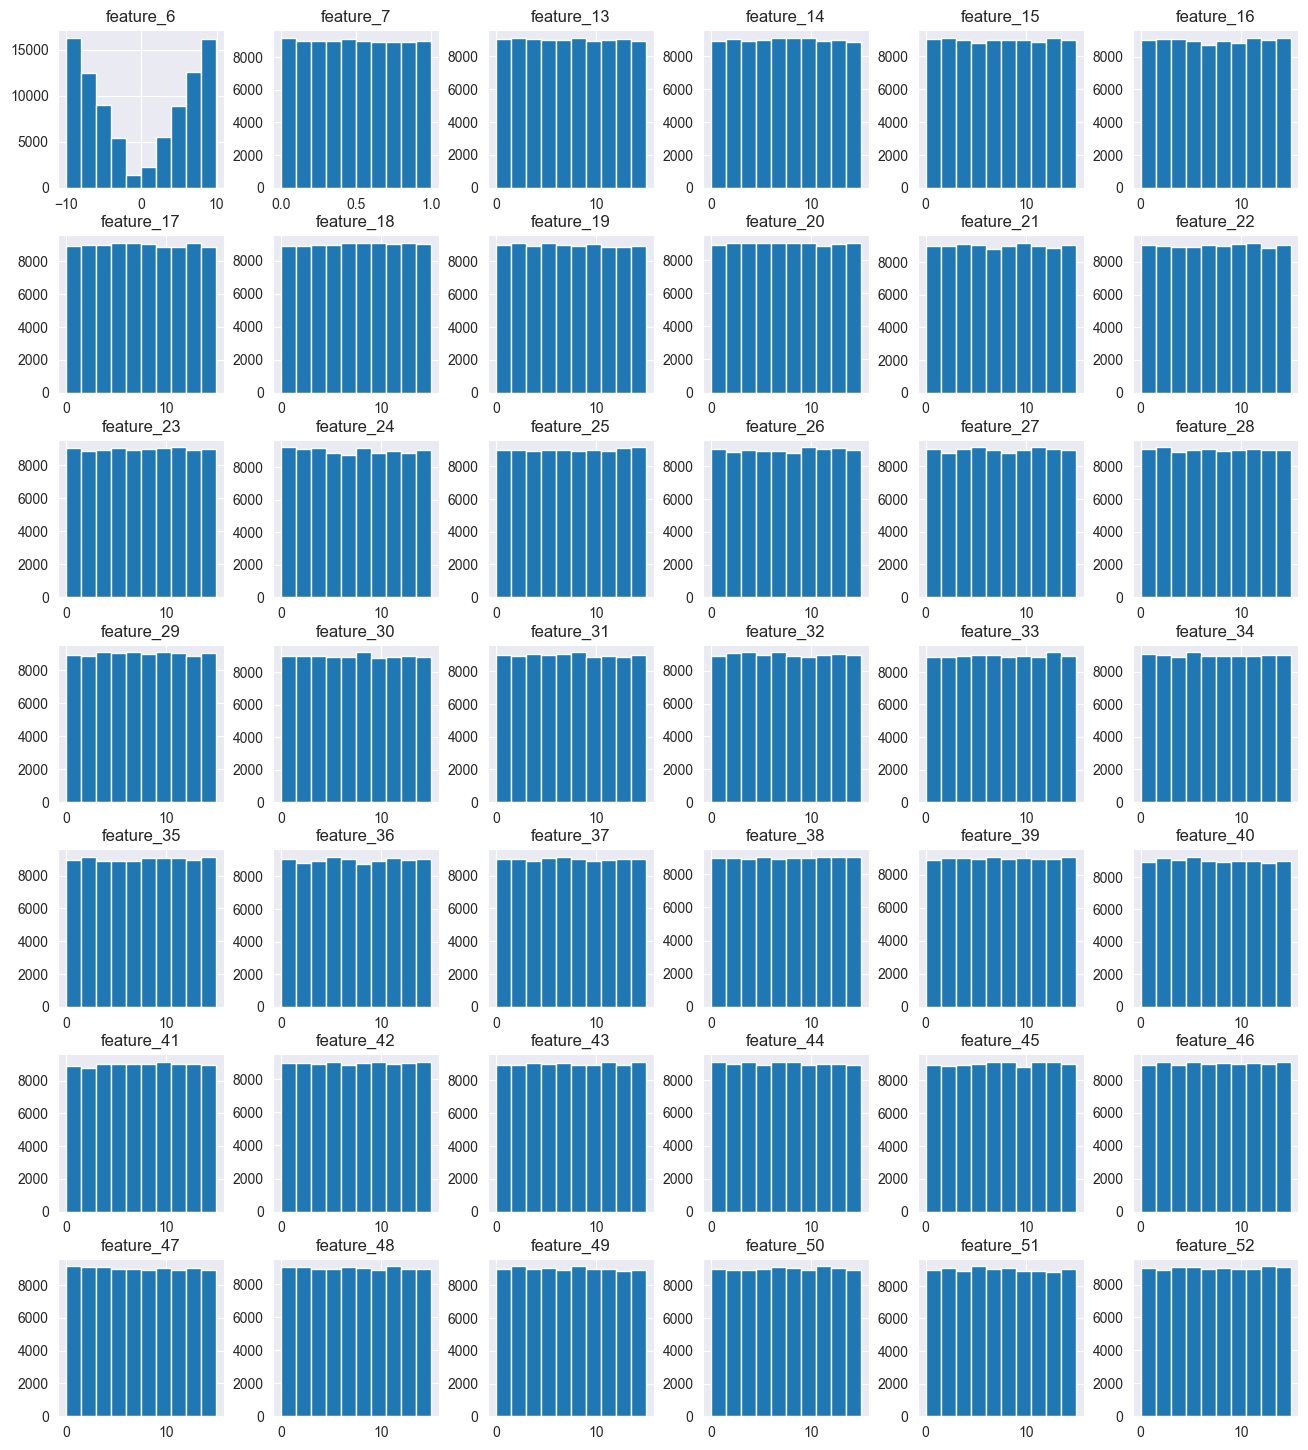

In [7]:
# Plotting histograms for numerical features
num_features.hist(bins=10, figsize=(16, 18),)
plt.show()


 *All features are close to uniform distribution, except feature 6*

<Axes: xlabel='target', ylabel='Count'>

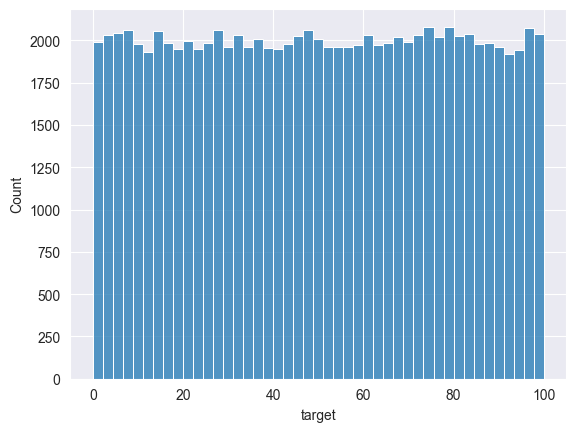

In [8]:
# Target
sns.histplot(x=df['target']) 


*Target is also uniformly distributed*

### Checking correlation matrix

In [9]:
# Calculate correlations with Kendall and Spearman. 
# Not using Pearson because of its normality assumption
df_corr_matrix = df.corr(method='kendall')


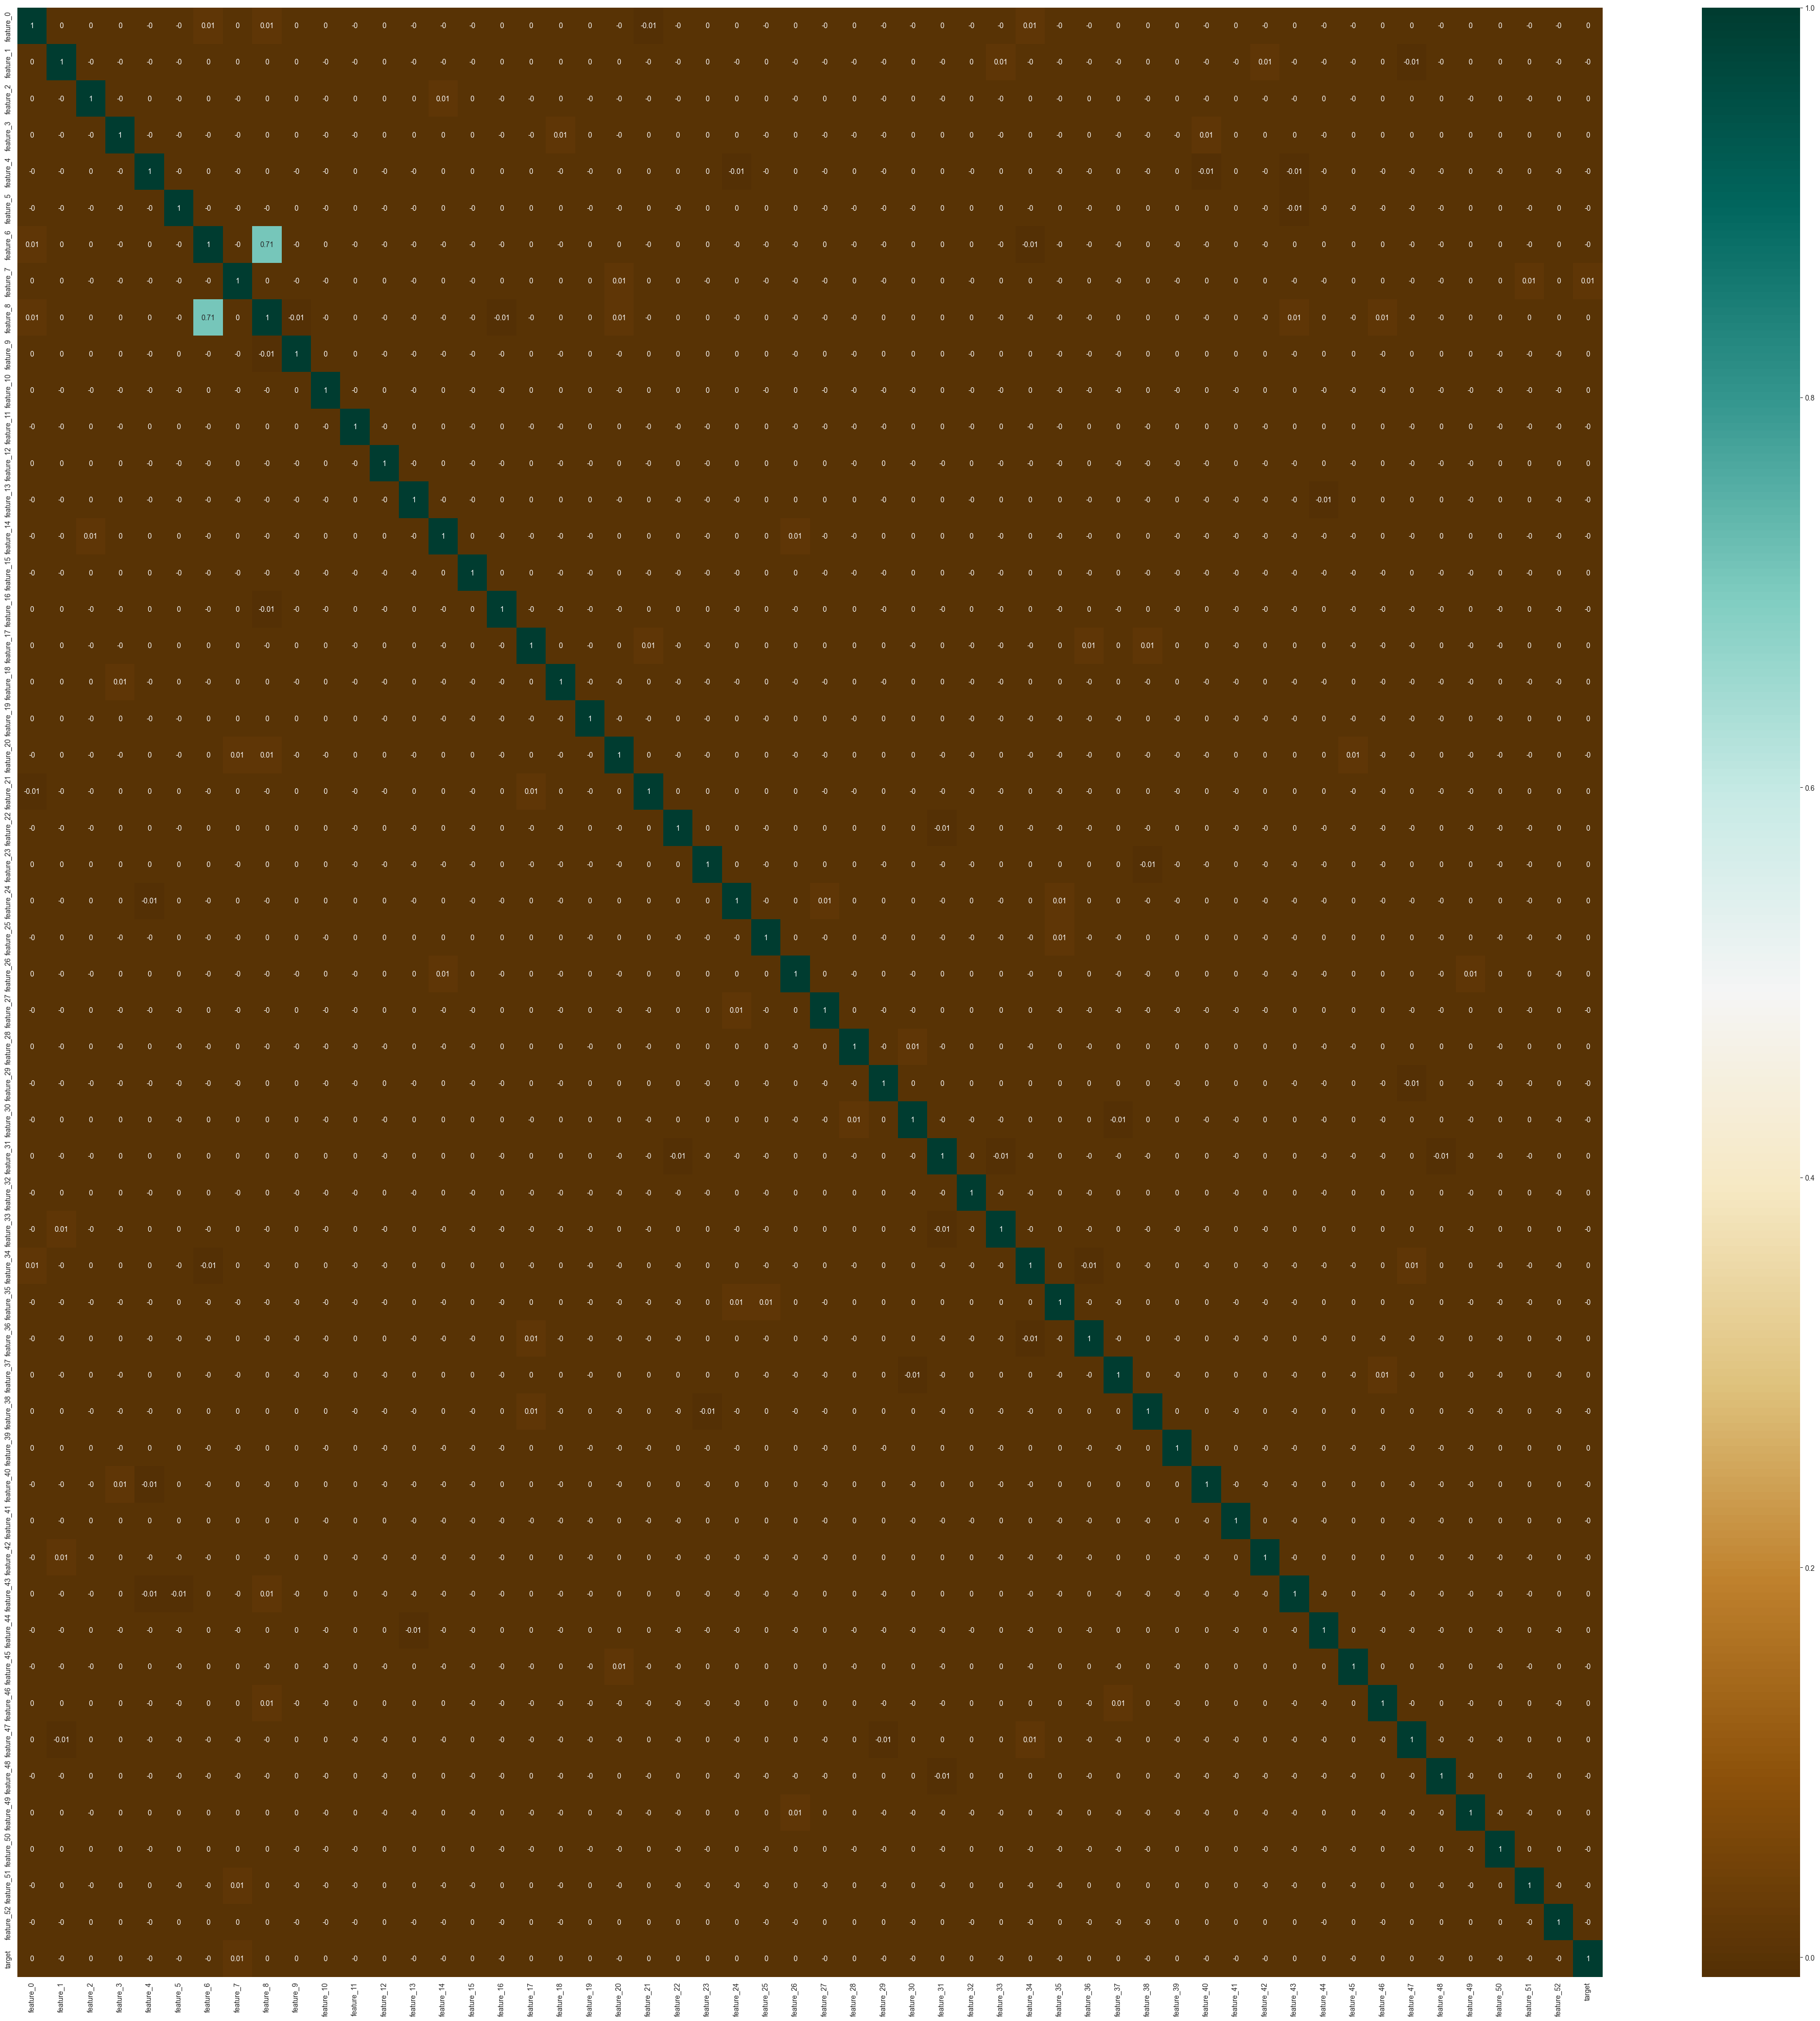

In [10]:
plt.figure(figsize=(50, 50))
sns.heatmap(df_corr_matrix.round(2),cmap="BrBG",annot=True)
plt.show()
# df_corr_matrix

No correlation is detected except features 8 and 6.
Checking its relation. 
We can start with checking how the 6th distribution is related with feature's 8 value.


<Axes: >

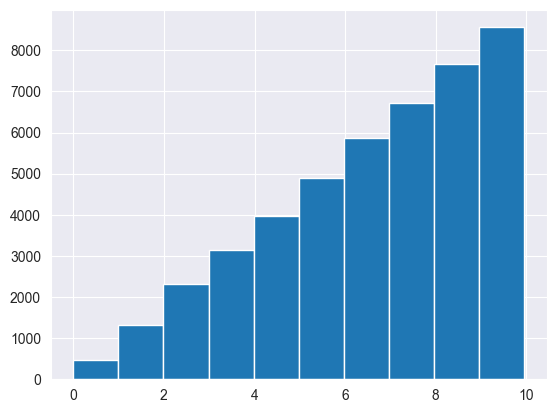

In [11]:
features[features['feature_8'] == 1]['feature_6'].hist(bins=10)

<Axes: >

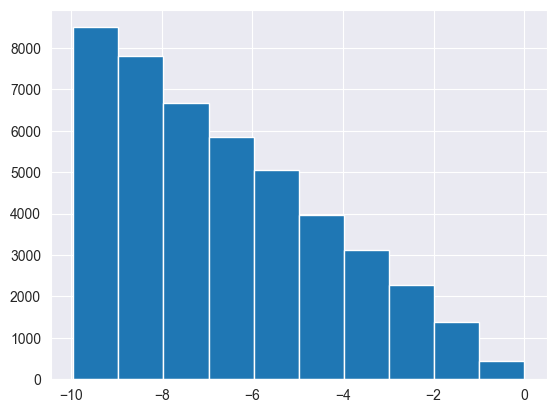

In [12]:
features[features['feature_8'] == 0]['feature_6'].hist(bins=10)# Means it is better to start with non-linear models

Basically feature 8 is just a flag on condition (feature_6 > 0). Let's keep it for now


*As there is no clear linear dependency between any feature and target,
we can start with using some complex non-linear estimator as an initial guess. 
It could be either tree-based ensemble model or SVRegressor with different kernels
Let's begin with simple Random Forest regressor and check either it finds any relations between features and targets or not.*


### Checking non-linear estimator performance

In [13]:
# We can check feature importance to find any "usefull" features
# Let's also compare with dummy predictor
from sklearn.ensemble import RandomForestRegressor
def dummy_predict(X):
    return np.random.uniform(0, 100, X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(features, df['target'], test_size=0.2, random_state=42)
# Keep n_estimators=50 as initial guess
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)

# Predictions and evaluation
y_dummy_pred = dummy_predict(X_test)
print(f'RMSE Dummy: {root_mean_squared_error(y_test, y_dummy_pred)}')

y_pred = model.predict(X_test)
print(f'RMSE Regressor: {root_mean_squared_error(y_test, y_pred)}')

RMSE Dummy: 40.891572516139625
RMSE Regressor: 0.004017732962049261


Looks like it caught some dependencies as RF is much better then dummy

In [14]:
# Checking "important" features
importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importance
})

sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

sorted_features

,Feature,Importance
6,feature_6,9.999e-01
7,feature_7,9.957e-05
23,feature_23,1.169e-09
41,feature_41,1.159e-09
43,feature_43,1.158e-09
14,feature_14,1.158e-09
52,feature_52,1.154e-09
30,feature_30,1.150e-09
34,feature_34,1.150e-09
10,feature_10,1.149e-09


It says that feature 6 contributed with 99.99% score, which that the relation is strong.
It could be the only feature that contributes to target.


<Axes: xlabel='feature_6', ylabel='target'>

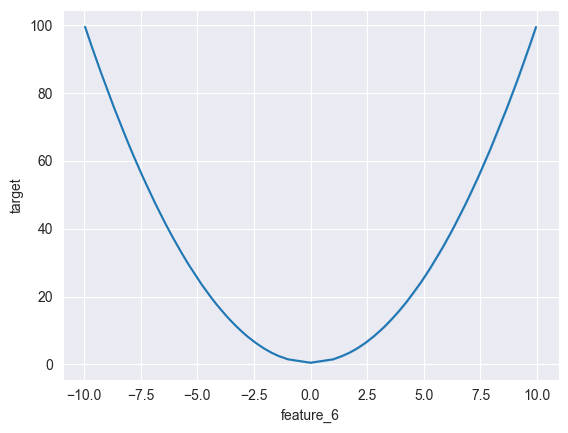

In [15]:
# Checking plot 
feature_sixth_df = df[['feature_6', 'target']]
feature_sixth_df = feature_sixth_df.sort_values(by='target')
sns.lineplot(x=feature_sixth_df['feature_6'], y=feature_sixth_df['target'])

In [16]:
# Looks like 2-order polynomial dependency
# Checking the correlation with polynomial features up to 3 order.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X = df['feature_6'].values
print(X.shape)
y = df['target'].values
X_poly = poly.fit_transform(X.reshape(-1, 1))

X_poly_df = pd.DataFrame()
X_poly_df['order_1'] = X_poly[:, 1]
X_poly_df['order_2'] = X_poly[:, 2]
X_poly_df['order_3'] = X_poly[:, 3]
X_poly_df['target'] = df['target']
X_poly_df.corr(method='kendall')

(90000,)


,order_1,order_2,order_3,target
order_1,1.000,-0.001,1.000,-0.001
order_2,-0.001,1.000,-0.001,0.995
order_3,1.000,-0.001,1.000,-0.001
target,-0.001,0.995,-0.001,1.000


We have the clear evidence of target to be linearly dependent on 2-order of feature 6


In [17]:
# Lets make linear model
# Also compare the RMSE of Random forest with initially guessed parameter. 
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_poly_df[['order_2']], df['target'], test_size=0.1, random_state=1)

linear_model.fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))
y_pred = linear_model.predict(X_test)
print(root_mean_squared_error(y_test, y_pred))


0.2899107321289083
0.2897232205405336


The RMSEs are of the same order. Probably, it is possible for RF to be accurate after hyperparameters tuning.

In [18]:
linear_model.coef_

array([1.00001569])

<Axes: xlabel='target', ylabel='Count'>

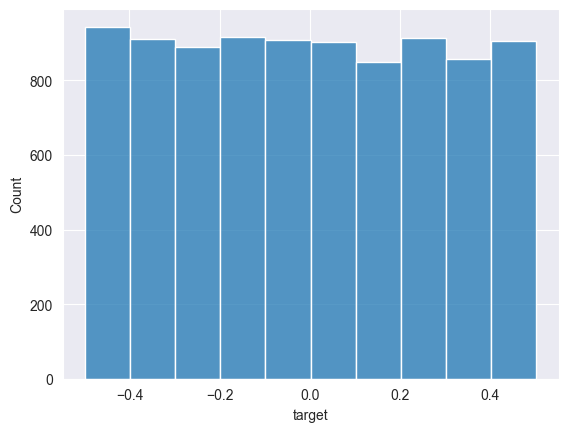

In [19]:
# Checking residuals distribution
residuals = y_test - y_pred
sns.histplot(residuals, bins=10)

 The residuals are distributed nearly uniformly 
 As we have some non-linear dependency between the key feature and target, 
 need to check either residuals correlate with other features.
 

<Axes: >

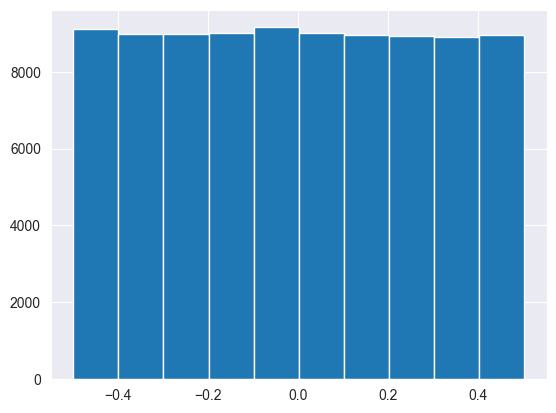

In [22]:
y_pred_all_dataset = linear_model.predict(X_poly_df[['order_2']])
residuals_all_dataset = df['target'] - y_pred_all_dataset
df['residuals'] = residuals_all_dataset
df['residuals'].hist(bins=10)


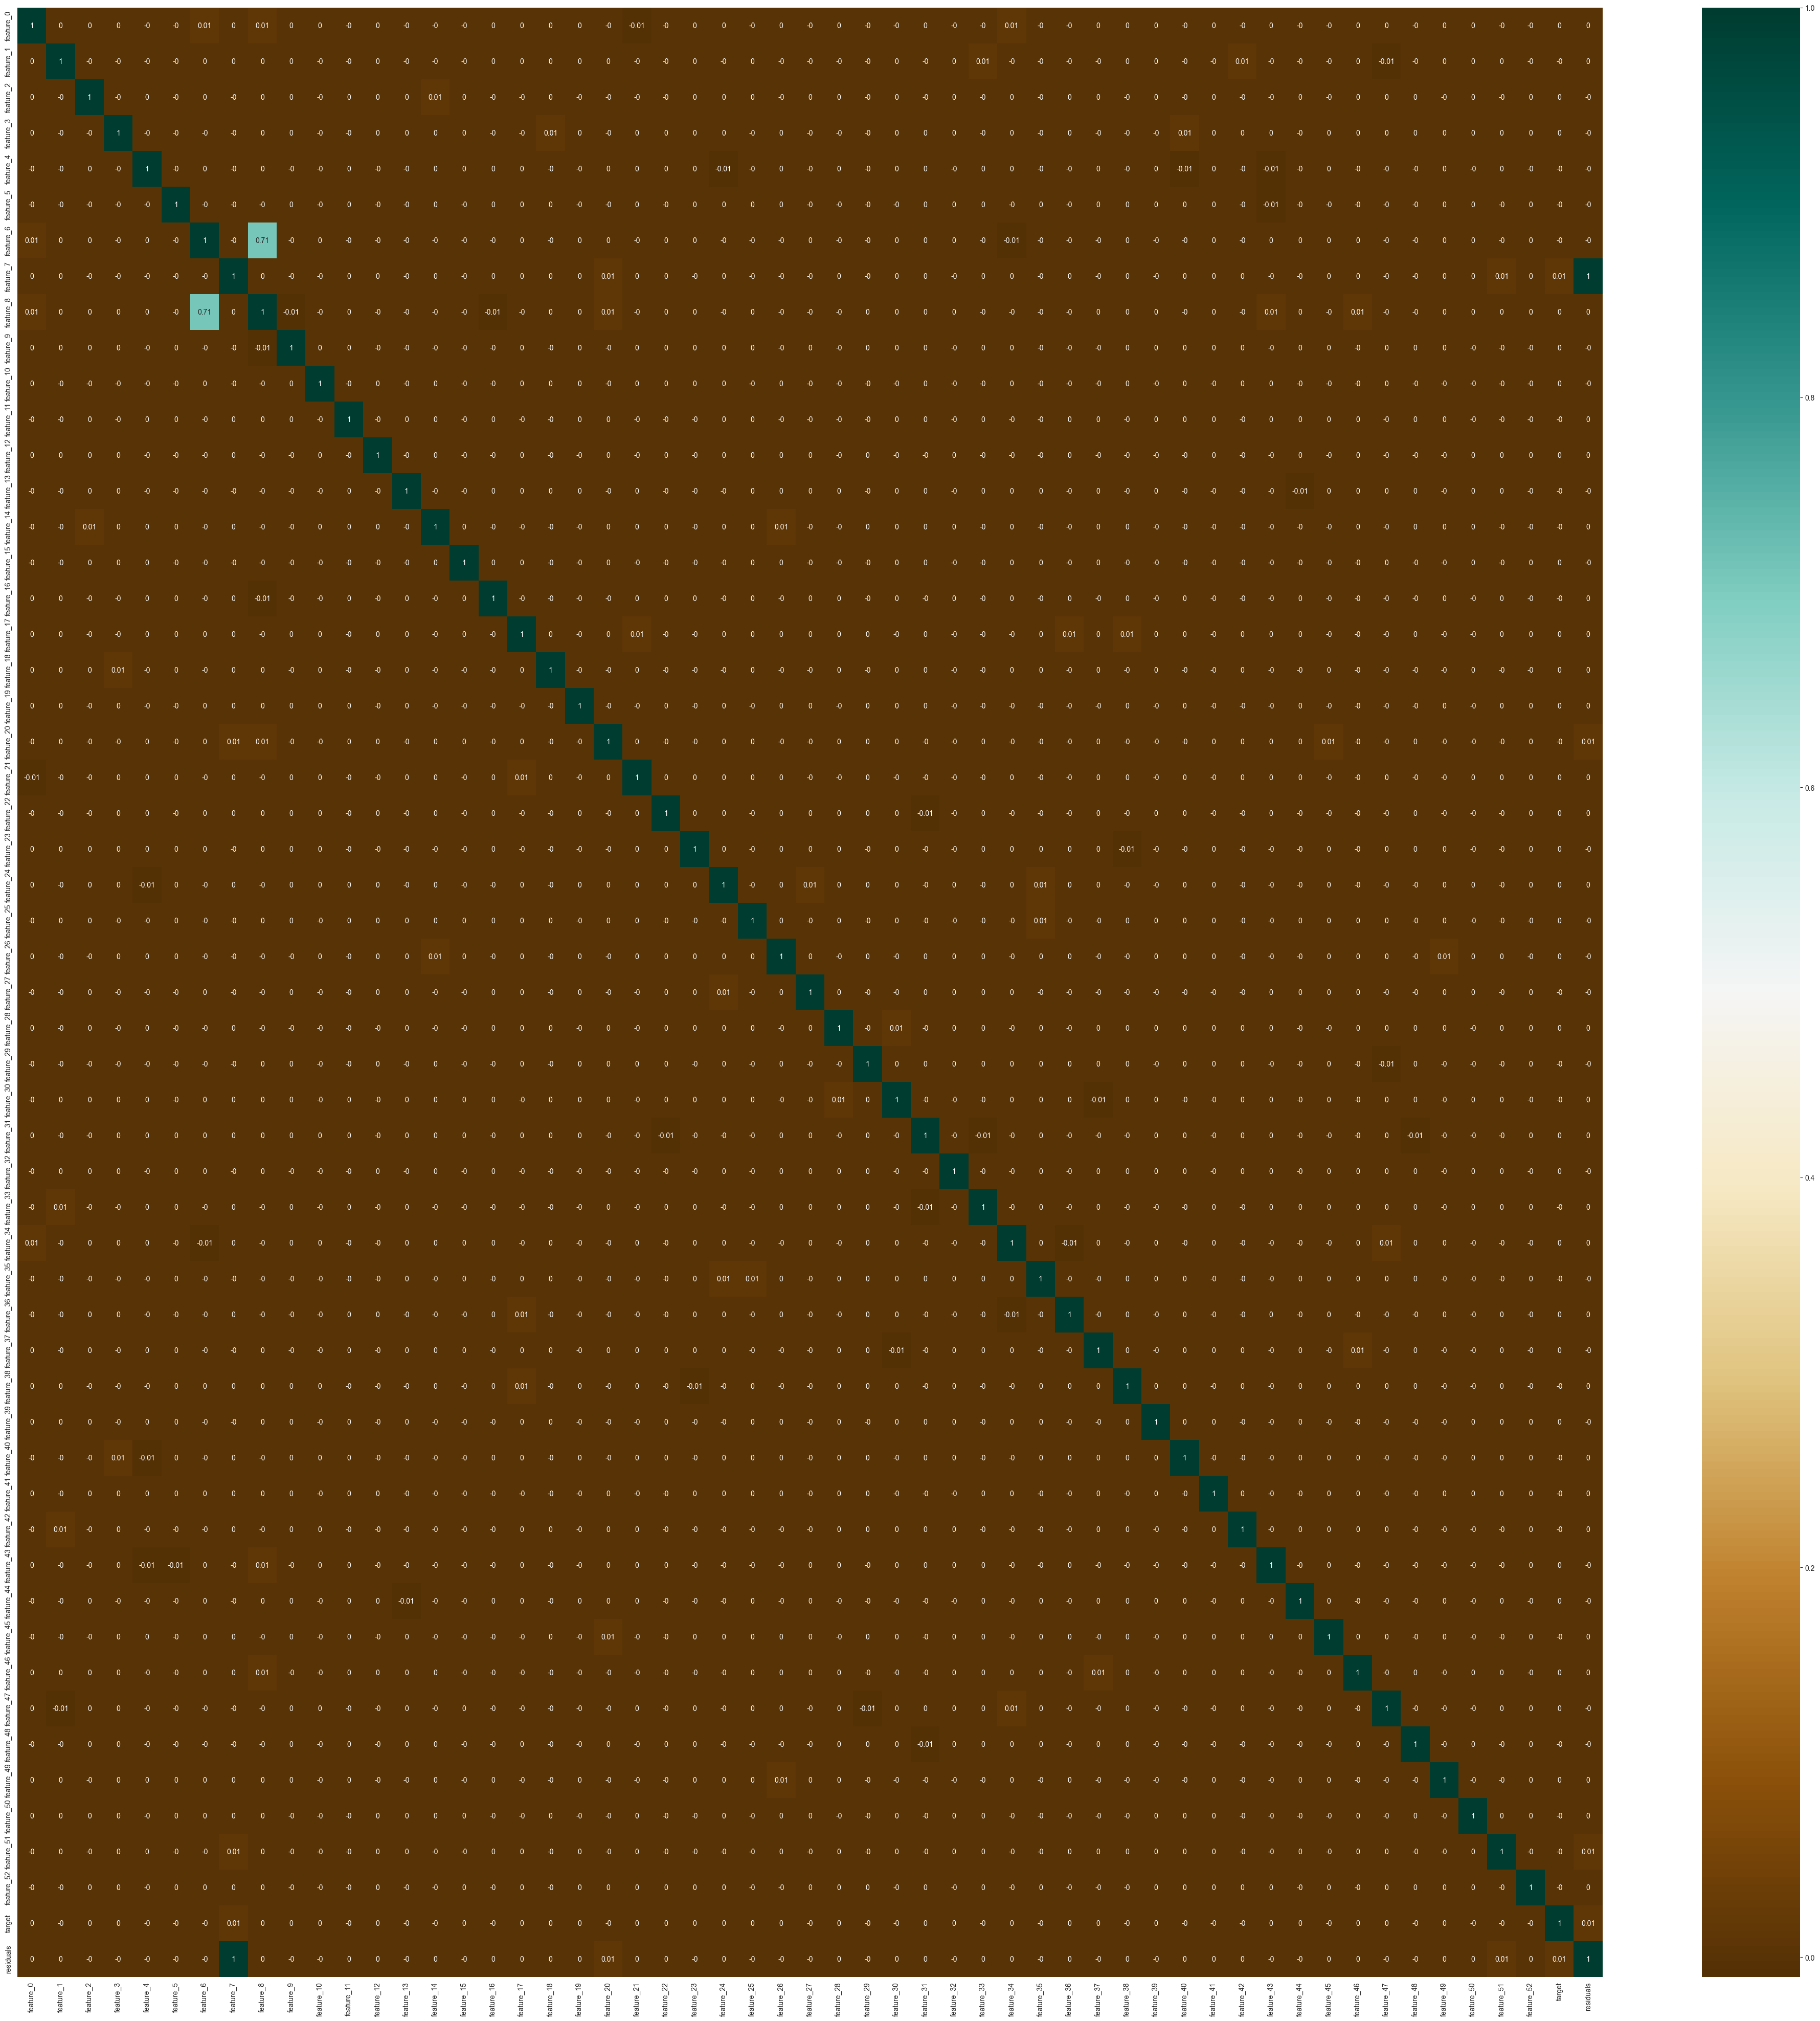

In [23]:
new_corr_df = df.corr(method='kendall')
plt.figure(figsize=(50, 50))
sns.heatmap(new_corr_df.round(2),cmap="BrBG",annot=True)
plt.show()

Have a perfect correlation with feature 7 and residuals. 
It is also aligned with feature importance score from RF estimator, where the 7th has nearly 1e-3 importance, and all others are around 1e-8.
Means that we need to include this feature in linear regression.

In [24]:
final_features = pd.DataFrame()
final_features_list = ['squeared_feature_6', 'feature_7']
final_features['squeared_feature_6'] = X_poly_df[['order_2']]
final_features['feature_7'] = df['feature_7']

X_train, X_test, y_train, y_test = train_test_split(final_features[final_features_list], df['target'], test_size=0.1, random_state=1)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print('Final RMSE:')
print(root_mean_squared_error(y_test, y_pred))
print(linear_model.coef_)

Final RMSE:
1.2352311521703158e-14
[1. 1.]


#### I choose the linear model due to its high performance and simplicity in this case comparing to any non-linear estimator